# Question 2

A propriedade de ordenação topológica do algoritmo SOM pode ser usada para formar uma representação bidimensional abstrata para fins de visualização de um espaço de entrada de alta dimensionalidade. O objetivo é visualizar os dados de dimensão 8 em um espaço de dimensão 2, constituído pela grade de neurônios. Para investigar esta forma de representação, considere uma grade bidimensional de neurônios que é treinada tendo como entrada os dados oriundos de quatro distribuições gaussianas, C1, C2, C3, e C4, em um espaço de entrada de dimensionalidade igual a oito, isto é $x = (x_1, x_2, ..., x_8)^t$ . Todas as nuvens têm variâncias unitária, mas centros ou vetores média diferentes dados por $m_1 = (0,0,0,0,0,0,0,0)^t$, $m_2 = (0,0,0,0,0,0,0,0)^t$, $m_3 = (0,0,0,0,0,0,0,0)^t$, $m_4 = (0,0,0,0,0,0,0,0)^t$. Calcule o mapa produzido pelo algoritmo SOM, e verifique como as distribuições dos dados estão representadas. 

### Importando Bibliotecas Necessárias

In [1]:
%pip install minisom

  Using cached minisom-2.3.5-py3-none-any.whl

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [22]:
from sklearn.datasets import make_blobs
import numpy as np
from minisom import MiniSom
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.patches import Rectangle
from matplotlib import pyplot as plt
from matplotlib import cm, colorbar
from matplotlib.lines import Line2D

### Definindo os vetores média passados na questão

In [14]:
# data
m1 = np.zeros(8)
m2 = np.array([4,0,0,0,0,0,0,0])
m3 = np.array([0,0,0,4,0,0,0,0])
m4 = np.array([0,0,0,0,0,0,0,4])

In [15]:
# center
centers = np.array([m1, m2, m3, m4])
centers

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [4., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 4., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 4.]])

### Gerando dados considerando os centros pré-definidos

In [16]:
# Gera um conjunto de dados com 1000 amostras distribuídas em centros específicos, com 8 características
np.set_printoptions(precision=3)
data, y = make_blobs(n_samples=1000, centers=centers, n_features=8, random_state=42)

In [17]:
# as primeiras cinco amostras do conjunto de dados
print('Amostra do conjunto de dados\n\n', data[:5])

Amostra do conjunto de dados

 [[ 0.819  0.424 -0.966  3.461 -0.467 -1.483 -0.818 -1.134]
 [-0.102 -0.842  0.751  4.654  0.972 -0.013 -0.6   -1.559]
 [ 1.52  -2.136  0.76  -0.84   1.372  0.142 -0.673  4.663]
 [ 1.639  0.908 -0.707  2.21   0.327 -0.835  1.653  6.078]
 [-0.063  0.241  0.085  4.798  0.924 -1.051  0.869 -1.186]]


### Inicializando a Rede SOM em grade 10x10

In [18]:
som = MiniSom(
    10, 10, 8,  # Dimensões da grade do SOM: 10x10, com vetores de entrada de tamanho 8
    sigma=1.5, learning_rate=.7,  # Parâmetros de controle do treinamento
    activation_distance='euclidean',  # Distância euclidiana como métrica de ativação
    topology='hexagonal',  # Topologia hexagonal para a grade do SOM
    neighborhood_function='gaussian'  # Função de vizinhança gaussiana
)

### Treinamento

In [19]:
som.train(data, 100, verbose=True)  # Treina o SOM com 100 iterações, exibindo informações de progresso

 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 2.2189644220403832


### Plot do resultado da clusterização em grade quadrada 10 x 10

In [20]:
xx, yy = som.get_euclidean_coordinates()  # Obtém as coordenadas euclidianas dos neurônios da grade SOM
umatrix = som.distance_map()  # Calcula o mapa de distâncias (U-Matrix) para visualização do SOM
weights = som.get_weights()  # Obtém os pesos sinápticos dos neurônios da grade SOM

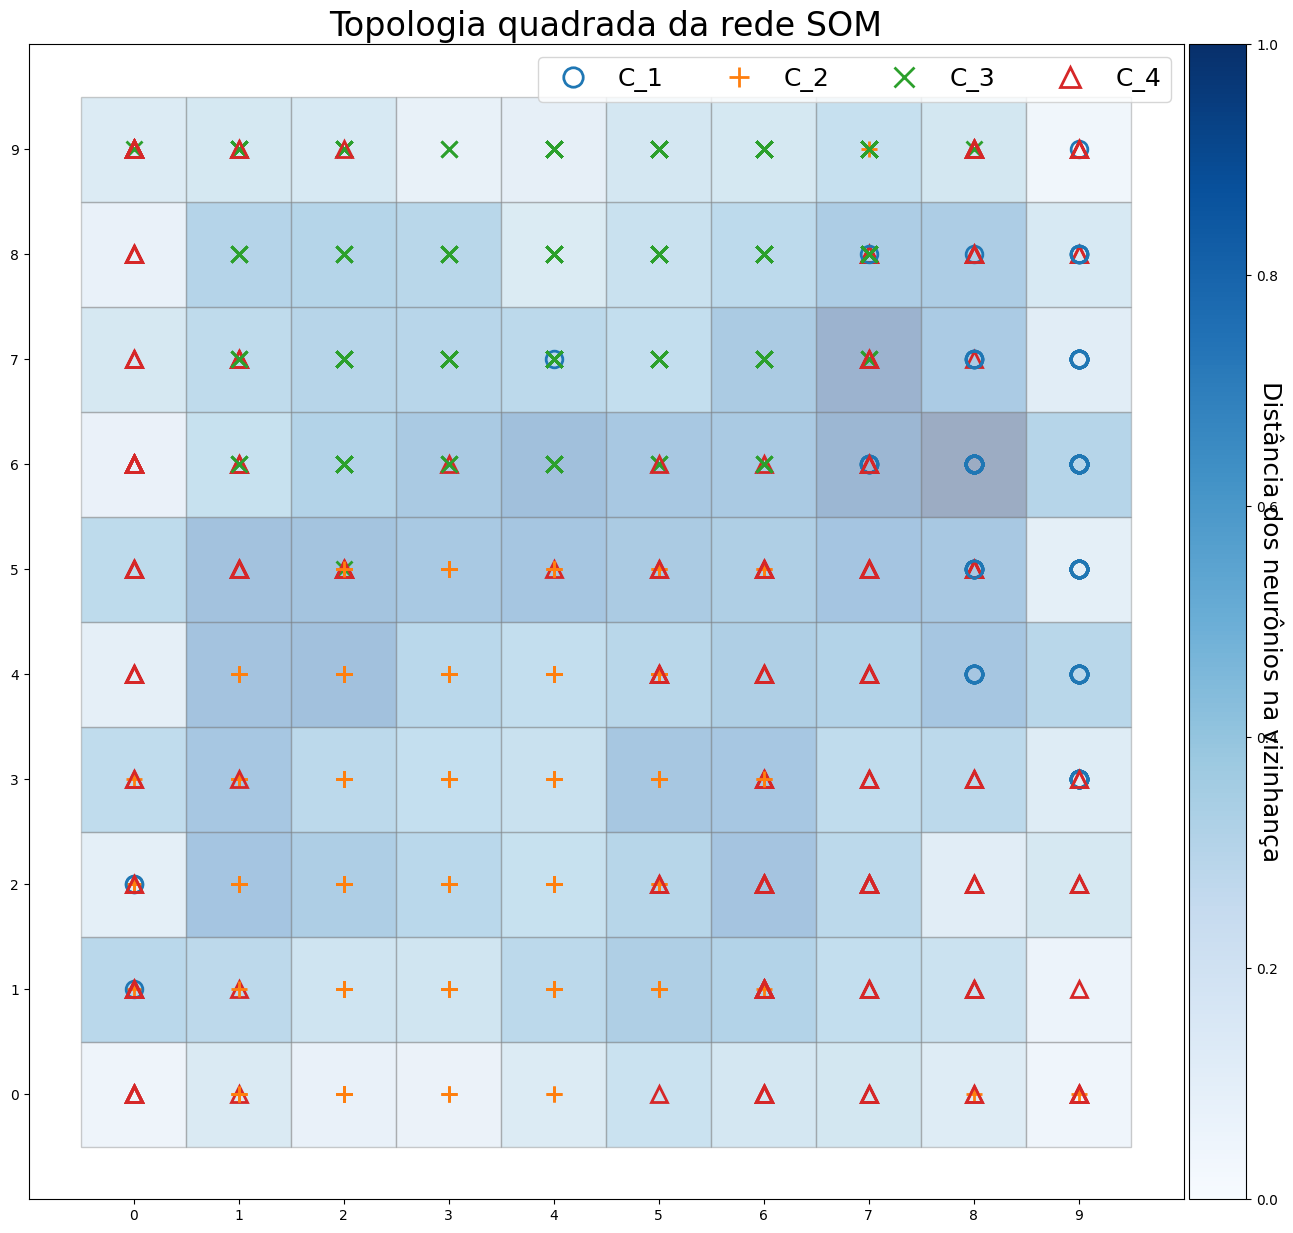

In [24]:
f = plt.figure(figsize=(22, 15))
ax = f.add_subplot(111)
ax.set_aspect('equal')

# Corrigir para coordenadas quadradas (sem uso de xx e yy)
for i in range(weights.shape[0]):
    for j in range(weights.shape[1]):
        rect = Rectangle(
            (i - 0.5, j - 0.5),  # canto inferior esquerdo baseado em i,j
            width=1, height=1,
            facecolor=cm.Blues(umatrix[i, j]),
            alpha=0.4,
            edgecolor='gray'
        )
        ax.add_patch(rect)

# Plotagem dos marcadores nas posições corretas
markers = ['o', '+', 'x', '^']
colors = ['C0', 'C1', 'C2', 'C3']
for cnt, x in enumerate(data):
    w = som.winner(x)
    wx, wy = w[0], w[1]  # usa diretamente as posições da grade
    plt.plot(
        wx, wy,
        markers[y[cnt] - 1],
        markerfacecolor='None',
        markeredgecolor=colors[y[cnt] - 1],
        markersize=12,
        markeredgewidth=2
    )

# Eixos com base em shape da grade
plt.xticks(np.arange(weights.shape[0]))
plt.yticks(np.arange(weights.shape[1]))

# Barra de cores
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)
cb1 = colorbar.ColorbarBase(ax_cb, cmap=cm.Blues, orientation='vertical', alpha=.4)
cb1.ax.set_ylabel('Distância dos neurônios na vizinhança', rotation=270, fontsize=18)
plt.gcf().add_axes(ax_cb)

# Legenda
legend_elements = [
    Line2D([0], [0], marker='o', color='C0', label='C_1', markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
    Line2D([0], [0], marker='+', color='C1', label='C_2', markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
    Line2D([0], [0], marker='x', color='C2', label='C_3', markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
    Line2D([0], [0], marker='^', color='C3', label='C_4', markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2)
]

ax.set_title('Topologia quadrada da rede SOM', fontsize=24)
ax.legend(handles=legend_elements, loc='upper right', ncol=4, fontsize=18)
plt.show()
